$\textbf{PROGRAMMING ASSIGNMENT}$
---

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.


### Complete the Tasks in bold

## Data Exploration



In [35]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
print(heart_disease.variables)
df = pd.DataFrame(X, columns=heart_disease.feature_names)
df['output'] = y
print("Number of missing values in each column:")
print(df.isnull().sum())
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [37]:
df = pd.concat([X, y], axis=1)
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


**TASK: Create a correlation heatmap.**

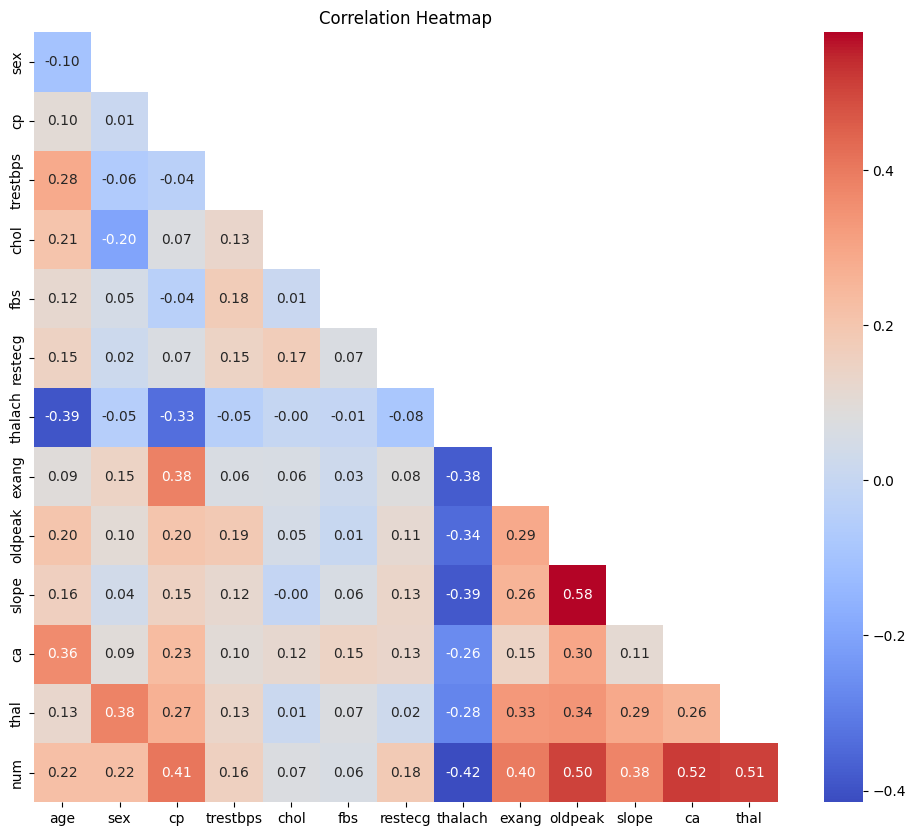

In [38]:
correlation_heatmap = df.corr()
plt.figure(figsize=(12, 10))
mask = np.zeros_like(correlation_heatmap, dtype=bool)
mask[np.triu_indices_from(mask)] = True
df_corr_viz = correlation_heatmap.mask(mask).dropna(how='all').dropna(axis=1, how='all')
sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [39]:
correlation_with_target = df.corrwith(X.iloc[:, -1]).abs()
sorted_correlation = correlation_with_target.sort_values(ascending=False)
top_correlated_features = sorted_correlation.head(5)
print("The top 5 correlated frequencies with the target/label:\n");
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

thal       1.000000
num        0.509923
sex        0.380936
oldpeak    0.341004
exang      0.329680
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.10, random_state=314)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (272, 13)
y_train: (272, 1)
X_test: (31, 13)
y_test: (31, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [41]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsRegressor())  
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [42]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())
full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [43]:
print("The best parameters are:")
param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

The best parameters are:


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=11))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=11),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 11,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

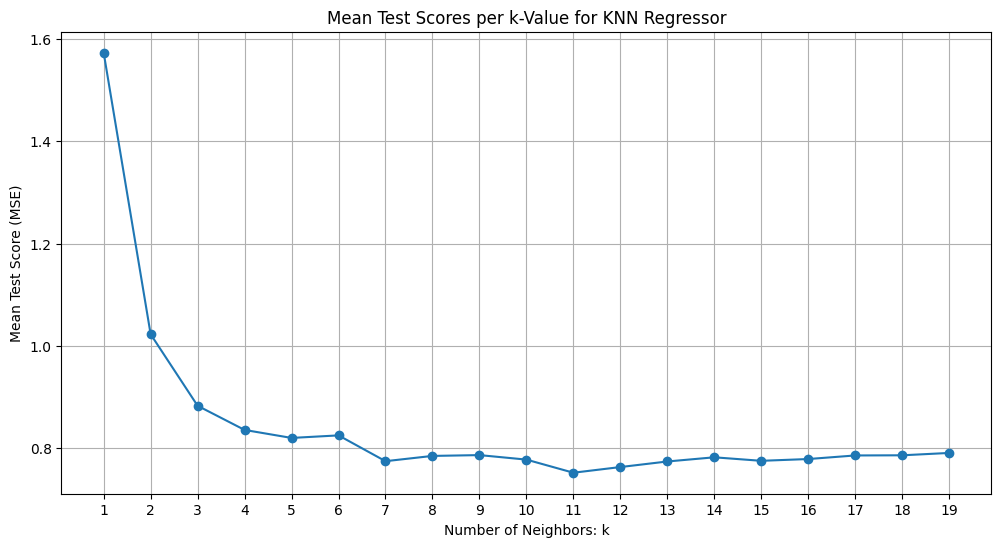

In [44]:
cv_results = full_cv_regressor.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = [param['knn__n_neighbors'] for param in cv_results['params']]
plt.figure(figsize=(12, 6))
plt.plot(k_values, -mean_test_scores, marker='o') 
plt.title('Mean Test Scores per k-Value for KNN Regressor')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Mean Test Score (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [45]:
best_estimator = full_cv_regressor.best_estimator_
y_pred_classes = np.where(y_pred < 0.5, 0, 1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))
print("Confusion Matrix Array:")
print(confusion_matrix(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.18      1.00      0.30         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.55        31
   macro avg       0.24      0.36      0.24        31
weighted avg       0.57      0.55      0.52        31

Confusion Matrix Array:
[[14  3  0  0  0]
 [ 0  3  0  0  0]
 [ 0  4  0  0  0]
 [ 0  5  0  0  0]
 [ 0  2  0  0  0]]
